<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-6-pandas-sql/Matplolib_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :

## ScatterPlot with 2 variables, title and legend
First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph

X-axis stay "DATE" for both values

You have to add title and legend

Here is an example of what is expected :

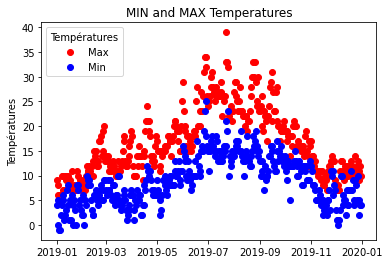

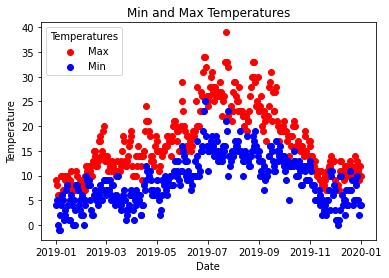

In [4]:
# Complete the code below :

plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red')
plt.scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue') #You have to complete this code. You could probably try to copy the previous line, and change max temperature by min temperature ?
plt.legend(['Max', 'Min'], title='Temperatures', loc='upper left')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Min and Max Temperatures')
plt.show()


## 2 charts on the same figure
Now, complete this code to have MAX and MIN Temperature in 2 charts, MAX on the left side and MIN on the right side 

The X axis have to be the date of the year

Each graph must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

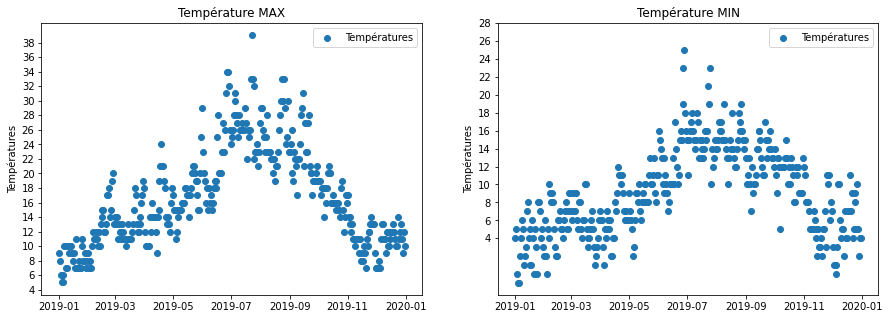

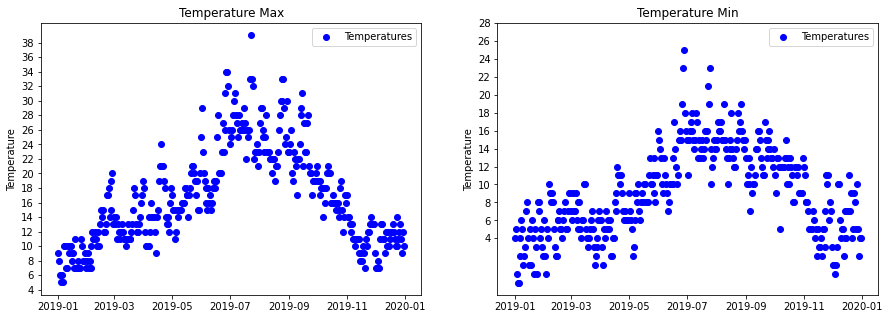

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (15,5)) 
ax[0].scatter(x = df_weather["DATE"], y = df_weather['MAX_TEMPERATURE_C'], c= 'b')
ax[0].yaxis.set_ticks(range(4,40,2))
ax[0].title.set_text('Temperature Max')
ax[0].set_ylabel('Temperature')
ax[0].legend(["Temperatures"],loc="upper right")

ax[1].scatter(x = df_weather["DATE"], y = df_weather['MIN_TEMPERATURE_C'], c= 'b')
ax[1].yaxis.set_ticks(range(4,30,2)) 
ax[1].title.set_text('Temperature Min')
ax[1].set_ylabel('Temperature')
ax[1].legend(["Temperatures"],loc="upper right")

plt.show()

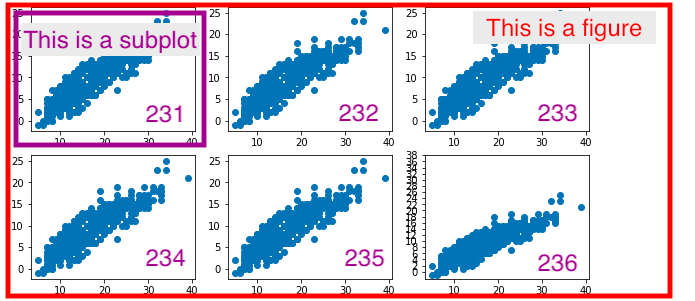

## and 4 charts now !
Now, you have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : an histogram of MAX Temperature

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

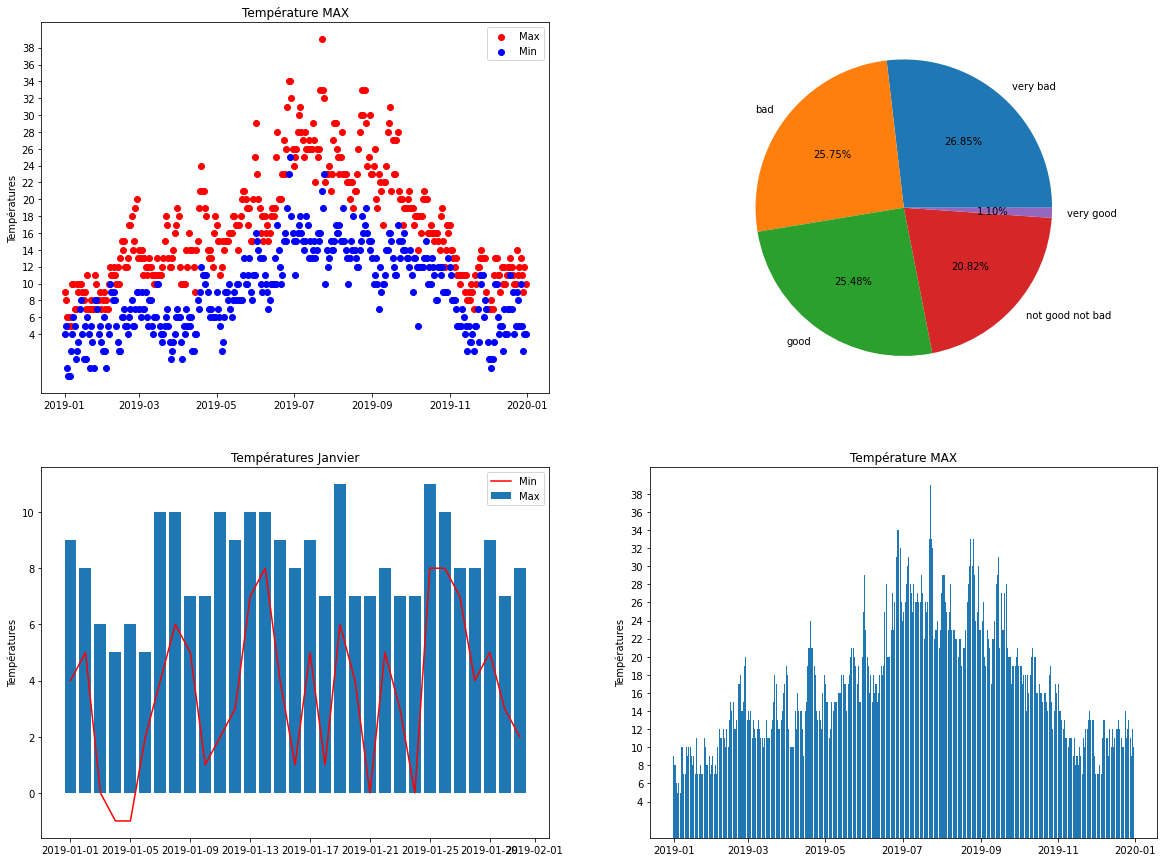

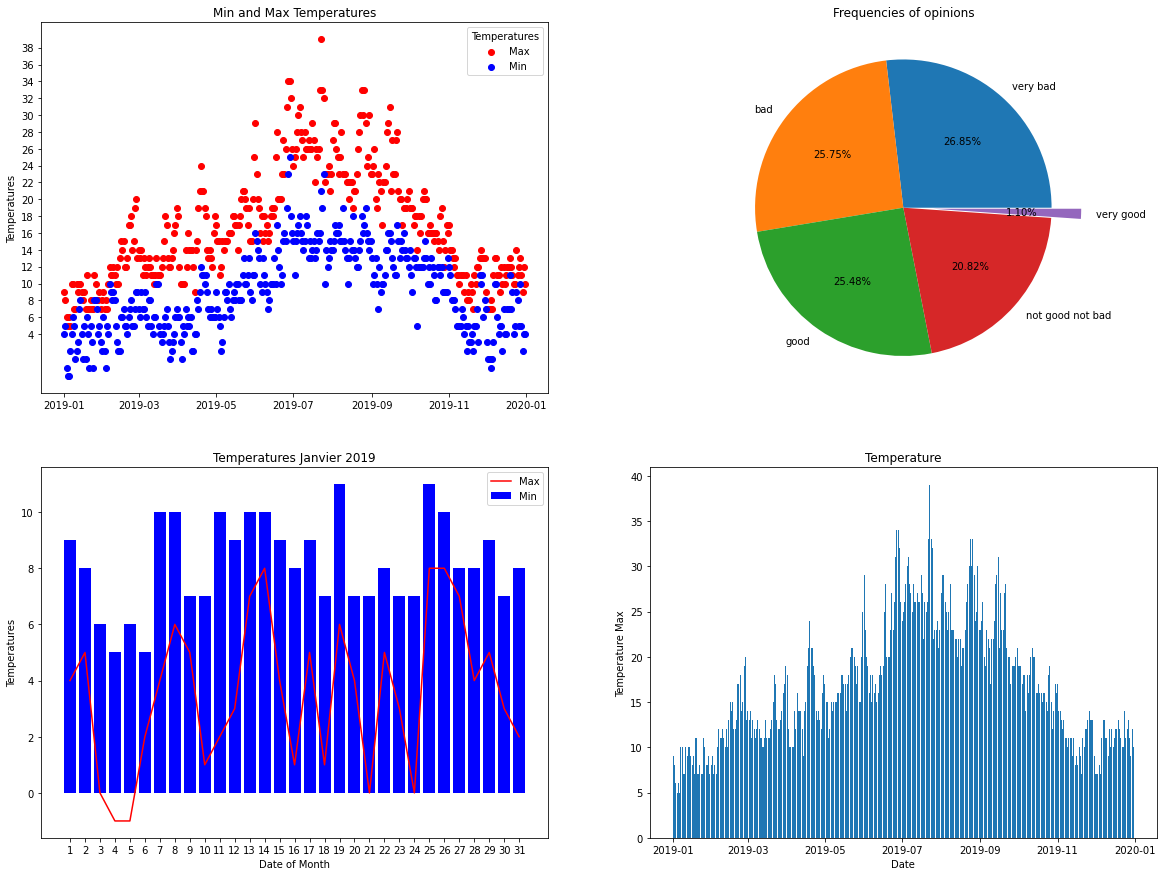

In [ ]:
# Complete the code below :
fig, ax = plt.subplots(nrows=2, ncols=2,figsize = (20,15)) # fig is the global figure, which contains 2 subplots here (ax1 and ax2)

ax[0,0].scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red')
ax[0,0].scatter(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue') 
ax[0,0].yaxis.set_ticks(range(4,40,2))
ax[0,0].title.set_text('Min and Max Temperatures')
ax[0,0].set_ylabel('Temperatures')
ax[0,0].legend(['Max', 'Min'], title='Temperatures', loc='upper right')

explode = (0, 0, 0, 0, .2) 
ax[0,1].pie(df_weather['OPINION'].value_counts(normalize=True).values, 
          labels = df_weather['OPINION'].value_counts(normalize=True).index,
          explode = explode,
          autopct='%1.2f%%')
ax[0,1].title.set_text('Frequencies of opinions')

#I adjusted title to not have full dates printing on n X axis
df_weather_dt = df_weather.set_index("DATE")
df_weather_dt_jan = df_weather_dt.loc['2019-01-01':'2019-01-31']
ax[1,0].bar(df_weather_dt_jan.index.day, df_weather_dt_jan["MAX_TEMPERATURE_C"], color='blue')
ax[1,0].plot(df_weather_dt_jan.index.day, df_weather_dt_jan["MIN_TEMPERATURE_C"], color='red')
ax[1,0].title.set_text('Temperatures Janvier 2019')
ax[1,0].set_ylabel('Temperatures')
ax[1,0].set_xlabel('Date of Month')
ax[1,0].xaxis.set_ticks(range(1,32,1))
ax[1,0].legend(['Max', 'Min'], loc='upper right')


min_t = min(df_weather["MAX_TEMPERATURE_C"])
max_t = max(df_weather["MAX_TEMPERATURE_C"])

ax[1,1].bar(df_weather["DATE"], df_weather["MAX_TEMPERATURE_C"])
ax[1,1].title.set_text('Temperature')
ax[1,1].set_ylabel('Temperature Max')
ax[1,1].set_xlabel('Date')

plt.show()

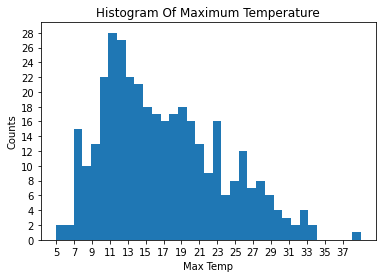

In [ ]:
#Hist of Max
plt.hist(df_weather["MAX_TEMPERATURE_C"], bins=35)
plt.title('Histogram Of Maximum Temperature')
plt.ylabel('Counts')
plt.xlabel('Max Temp')
plt.xticks(range(min_t,max_t,2))
plt.yticks(range(0,30,2))
plt.show()

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : index can help you to sort the date correctly

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

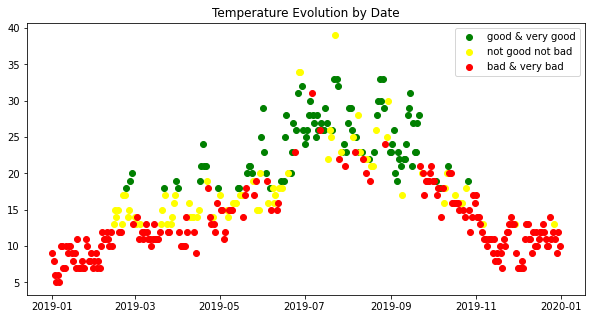

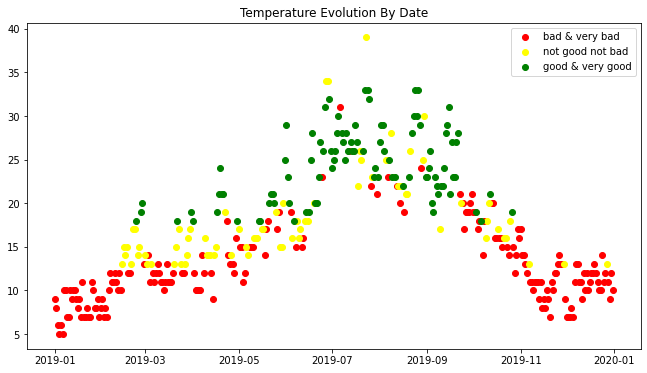

In [ ]:
df_good = df_weather[(df_weather["OPINION"] == 'good') | (df_weather["OPINION"] == 'very good')]
df_neither = df_weather[(df_weather["OPINION"] == 'not good not bad')]
df_bad = df_weather[(df_weather["OPINION"] == 'bad') | (df_weather["OPINION"] == 'very bad')]

plt.figure(figsize=(11,6))

plt.scatter(x = df_bad["DATE"], y = df_bad["MAX_TEMPERATURE_C"], c='red')
plt.scatter(x = df_neither["DATE"], y = df_neither["MAX_TEMPERATURE_C"], c='yellow')
plt.scatter(x = df_good["DATE"], y = df_good["MAX_TEMPERATURE_C"], c='green')

plt.legend(['bad & very bad', 'not good not bad', 'good & very good'])

plt.title('Temperature Evolution By Date')
plt.show()